<h2>Load Data</h2>
<ul>
    <li>Rank data based on price into 3 groups</li>
    <li>Get same amount of data from each group to make test data</li>
</ul>
<h5><b>NOTE:</b> csv file change maually and price column moved to the last column</h5>
<h5><b>NOTE:</b> Spliting data done after pre processing to have proper X_train and X_test at the end</h5>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold

In [2]:
# Load data
df = pd.read_csv('.\\car_details_v4.csv') # NOTE: Name of csv file after maniplating changed

# Split features and lables (prices)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Define a range and rank data based on their prices
min_price = y.min()
max_price = y.max()
step = (max_price - min_price) / 3
ranks = []

# Make 3 ranges and rank data based on their price's ranks
for i in range(3):
    ranks.append(range(int(min_price + i*step - 100), int(min_price + (i+1)*step) + 100))
temp = []
for index, row in df.iterrows():
    for j in range(len(ranks)):
        if row['Price'] in ranks[j]:
            temp.append(j)

# Add this column to data frame
df['rank'] = temp

<h2>Show some features</h2>
<ul>
    <li>Price</li>
    <li>Sitting Capisity</li>
    <li>Year</li>
    <li>Height</li>
    <li>Lenght</li>
    <li>Width</li>
</ul>

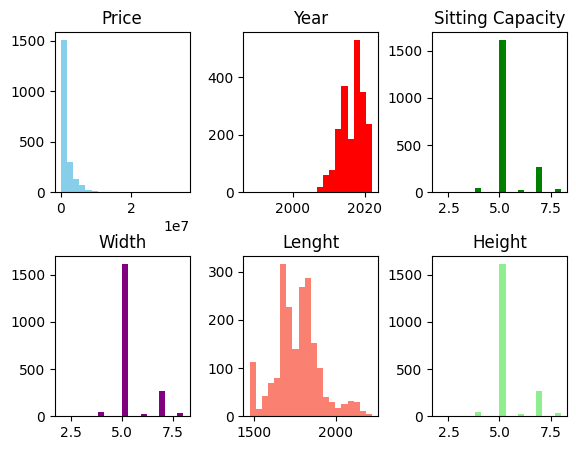

In [3]:
prices = y.values
years = df['Year'].values
siting = df['Seating Capacity'].values
widths = df['Width'].values
heights = df['Height'].values
lenghts = df['Length'].values

# Prices
plt.subplot(2, 3, 1)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
prices_hist = plt.hist(prices, bins=20, color='skyblue')
plt.title("Price")

# Years
plt.subplot(2, 3, 2)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
years_hist = plt.hist(years, bins=20, color='red')
plt.title("Year")

# Sitting Capacity
plt.subplot(2, 3, 3)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
makes_hist = plt.hist(siting, bins=20, color='green')
plt.title("Sitting Capacity")

# Widths
plt.subplot(2, 3, 4)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
makes_hist = plt.hist(siting, bins=20, color='purple')
plt.title("Width")

# Lenghts
plt.subplot(2, 3, 5)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
makes_hist = plt.hist(widths, bins=20, color='salmon')
plt.title("Lenght")

# Heights
plt.subplot(2, 3, 6)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
makes_hist = plt.hist(siting, bins=20, color='lightgreen')
plt.title("Height")

plt.show()

<h2>Missing Values</h2>
<h4>Statistics (Before Handling)</h4>

In [4]:
print(df.isnull().sum())

Make                    0
Model                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Max Power              80
Max Torque             80
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
Price                   0
rank                    0
dtype: int64


<h2>Missing Values</h2>
<h4>Diagram (Before Handling)</h4>

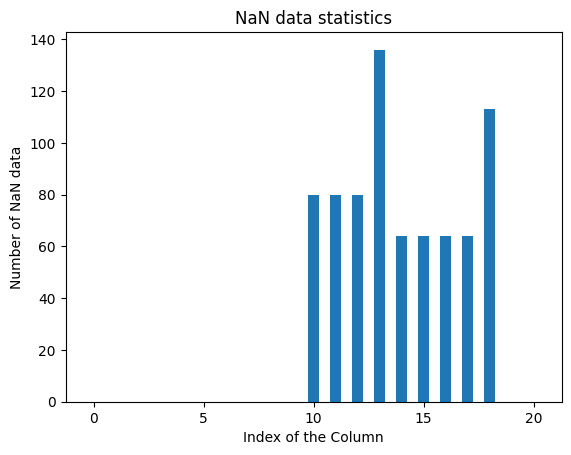

In [5]:
nan_list = df.isnull().sum().values
plt.bar([i for i in range(len(df.columns))], nan_list, width=0.5, align='center')
plt.xlabel("Index of the Column")
plt.ylabel("Number of NaN data")
plt.title("NaN data statistics")
plt.show()

<h2>Missing Values</h2>
<h4>Handling numeric and non-numeric missing values</h4>
<h5>Numeric Values</h5>
<ul>
    <li>Length</li>
    <li>Width</li>
    <li>height</li>
    <li>Fuel Tank Capacity</li>
    <li>Sitting Capacity</li>
    <li>Engine</li>
    <li>Max Power</li>
    <li>Max Torque</li>
</ul>
<h5>Non-Numeric Values</h5>
<ul>
    <li>Drivetrain</li>
</ul>
<h4><b>NOTE:</b> Selected method is to replace missing values with the mean of rest data</h4>

In [6]:
# Numeric Values
# Length
X['Length'] = X['Length'].fillna(X['Length'].mean())

# Width
X['Width'] = X['Width'].fillna(X['Width'].mean())

# Height
X['Height'] = X['Height'].fillna(X['Height'].mean())

# Fuel Tank Capacity
X['Fuel Tank Capacity'] = X['Fuel Tank Capacity'].fillna(X['Fuel Tank Capacity'].mean())

# Seating Capacity
X['Seating Capacity'] = X['Seating Capacity'].fillna(X['Seating Capacity'].mean())

# Engine
import copy
df_copy = copy.deepcopy(X)
engines = list(df_copy['Engine'].values)

for i in range(len(engines)):
    if type(engines[i]) == str:
        c_index = engines[i].find('c')
        engines[i] = int(engines[i][:c_index])

df_copy['Engine'] = np.array(engines)
df_copy['Engine'] = df_copy['Engine'].fillna(df_copy['Engine'].mean())

# Max Power
max_powers = copy.deepcopy(df_copy['Max Power'].values)
df_copy['Max Power'] = df_copy['Max Power'].fillna(np.random.choice(max_powers, size=1)[0])

# Max Torque
max_torques = copy.deepcopy(df_copy['Max Torque'].values)
df_copy['Max Torque'] = df_copy['Max Torque'].fillna(np.random.choice(max_torques, size=1)[0])

# Non-numeric Values
# Drivetrain
drivetrains = copy.deepcopy(df_copy['Drivetrain'].values)
df_copy['Drivetrain'] = df_copy['Drivetrain'].fillna(np.random.choice(drivetrains, size=1)[0])

# Set df again
# Worked with the copy version of df to do not change main data set
X = copy.deepcopy(df_copy)

<h2>Missing Values</h2>
<h4>Statistics (After Handling)</h4>

In [7]:
print(X.isnull().sum())

Make                  0
Model                 0
Year                  0
Kilometer             0
Fuel Type             0
Transmission          0
Location              0
Color                 0
Owner                 0
Seller Type           0
Engine                0
Max Power             0
Max Torque            0
Drivetrain            0
Length                0
Width                 0
Height                0
Seating Capacity      0
Fuel Tank Capacity    0
dtype: int64


<h2>Encoding categorical data</h2>
<ul>
    <li>Model</li>
    <li>Make</li>
    <li>Fuel Type</li>
    <li>Transmission</li>
    <li>Location</li>
    <li>Color</li>
    <li>Owner</li>
    <li>Seller Type</li>
    <li>Drivetrain</li>
</ul>

In [8]:
label_encoder = LabelEncoder()
X['Model'] = label_encoder.fit_transform(X['Model'])
X['Make'] = label_encoder.fit_transform(X['Make'])
X['Fuel Type'] = label_encoder.fit_transform(X['Fuel Type'])
X['Transmission'] = label_encoder.fit_transform(X['Transmission'])
X['Location'] = label_encoder.fit_transform(X['Location'])
X['Color'] = label_encoder.fit_transform(X['Color'])
X['Owner'] = label_encoder.fit_transform(X['Owner'])
X['Seller Type'] = label_encoder.fit_transform(X['Seller Type'])
X['Drivetrain'] = label_encoder.fit_transform(X['Drivetrain'])


<h2>Changing semi-categorical data</h2>
<ul>
    <li>Max Power</li>
    <li>Max Torque</li>
</ul>
<h4><b>NOTE:</b> Two numbers in these columns are concanate to each other and then cast to integer to make Max Power and Max Torque numeric</h4>

In [9]:
import re
# Max Power
max_powers = list(max_powers)
max_powers_edited = []
for i in range(len(max_powers)):
    temp = re.findall('[0-9]+', str(max_powers[i]))
    if len(temp) >= 2:
        num1 = copy.deepcopy(temp[0])
        num2 = copy.deepcopy(temp[1])
        num3 = int(num1 + num2)
        max_powers_edited.append(num3)
    else:
        num3 = int(num1)
        max_powers_edited.append(num3)

X['Max Power'] = np.array(max_powers_edited)

# Result
print("Max Power Column")
print(X['Max Power'])
    
# Max Torque
max_torques = list(max_torques)
max_torques_edited = []
for i in range(len(max_torques)):
    temp = re.findall('[0-9]+', str(max_torques[i]))
    if len(temp) >= 2:
        num1 = copy.deepcopy(temp[0])
        num2 = copy.deepcopy(temp[1])
        num3 = int(num1 + num2)
        max_torques_edited.append(num3)
    else:
        num3 = int(num1)
        max_torques_edited.append(num3)
X['Max Torque'] = np.array(max_torques_edited)

# Result
print("Max Torques Column")
print(X['Max Torque'])



Max Power Column
0        876000
1        744000
2        796000
3        826000
4       1483400
         ...   
2054    1383750
2055     555500
2056     706250
2057    1884000
2058     703600
Name: Max Power, Length: 2059, dtype: int32
Max Torques Column
0       1094500
1       1902000
2       1127619
3       1134200
4       3431400
         ...   
2054    3301600
2055     754000
2056    1024000
2057    4001750
2058    1951400
Name: Max Torque, Length: 2059, dtype: int32


<h2>Correlation Matrix</h2>
<ul>
    <li>Correlation data frame</li>
    <li>Correlation heatmap</li>
</ul>

                        Make     Model      Year  Kilometer  Fuel Type  \
Make                1.000000  0.164767  0.028599   0.047267   0.002192   
Model               0.164767  1.000000 -0.033830   0.026484  -0.070626   
Year                0.028599 -0.033830  1.000000  -0.296547  -0.012958   
Kilometer           0.047267  0.026484 -0.296547   1.000000  -0.180255   
Fuel Type           0.002192 -0.070626 -0.012958  -0.180255   1.000000   
Transmission        0.135597  0.196394 -0.171883   0.104907   0.086167   
Location            0.039270 -0.013518 -0.076476   0.034490   0.055145   
Color               0.039078  0.031841 -0.060233   0.061958  -0.030753   
Owner               0.009231 -0.004555 -0.282341   0.090439  -0.055889   
Seller Type        -0.041505 -0.023933 -0.037500   0.025995  -0.019066   
Engine              0.019639 -0.013651 -0.003862   0.061523  -0.330326   
Max Power          -0.126375 -0.081203  0.160643  -0.033176  -0.180510   
Max Torque         -0.088206 -0.039346

<Axes: >

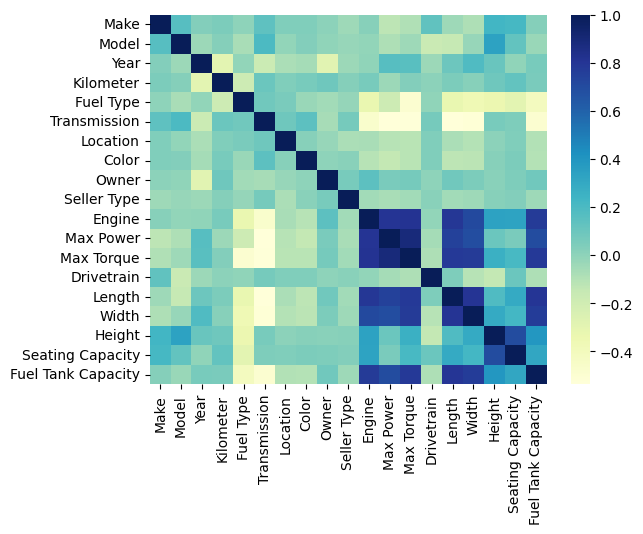

In [10]:
print(X.corr())
corr_mat = X.corr()
sns.heatmap(corr_mat, cmap='YlGnBu')


<h2>Explanation about correlation between features</h2>
<p>Features with high correlation can cause issues for machine learning models because they can introduce multicollinearity, which can lead to unstable estimates of the coefficients. This can make the model sensitive to small changes in the data and can affect the model's interpretability. Additionally, high correlation between features can make the model less generalizable to new data, as it may be overfitting to the training data. Therefore, it's important to identify and handle highly correlated features to ensure the model's performance and interpretability.</p>
<h4>Here are highly correlated features based on heatmap</h4>
<ul>
    <li>Max Torque</li>
    <li>Max Power</li>
    <li>Lenght</li>
    <li>Width</li>
    <li>Fuel Tank Capacity</li>
</ul>
<h5><b>NOTE:</b> With <b>PCA</b> I make a new feature based on these 5 highly correlated features and delete previous columns and add new feature</h5>

In [11]:
pca = PCA(n_components=1)
selected_df = X[['Max Power', 'Max Torque', 'Length', 'Width', 'Fuel Tank Capacity']]
pca_np_array = pca.fit_transform(selected_df)

del X['Max Power']
del X['Max Torque']
del X['Fuel Tank Capacity']
del X['Length']
del X['Width']
X['PCA New Feature'] = pd.DataFrame(pca_np_array)

<h2>Normalization</h2>
<h5>Use standard normalization</h5>

In [12]:
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
print(X_standardized)

[[-0.87682979 -1.36455963  0.17085758 ... -0.64771904 -0.37853166
  -0.8196618 ]
 [ 0.43197891  0.89404139 -0.72127028 ... -0.27433084 -0.37853166
  -0.38733346]
 [-0.7677624   1.63392794 -1.61339814 ... -0.31166966 -0.37853166
  -0.82056839]
 ...
 [-0.98589718 -0.232014   -1.01864623 ... -1.23020463 -0.37853166
  -0.90270515]
 [-1.53123414 -1.66635546  0.46823353 ... -0.8418809  -0.37853166
   1.10749779]
 [ 0.32291152 -1.26071591  0.17085758 ...  2.15269247  2.0933854
  -0.36896269]]


<h2>GridSearchCV</h2>
<ul>
    <li>Ridge</li>
    <li>Lasso</li>
</ul>

In [13]:
# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=df['rank'])

# Create a parameter grid
param_grid = {'alpha': [0.1, 1, 10]}

# Create a GridSearchCV object for Ridge
ridge_grid = GridSearchCV(Ridge(), param_grid, cv=5)
ridge_grid.fit(X_train, y_train)

# Create a GridSearchCV object for Lasso
lasso_grid = GridSearchCV(Lasso(), param_grid, cv=5)
lasso_grid.fit(X_train, y_train)

# Print the best parameters and the best score for Ridge
print("Best parameters for Ridge: ", ridge_grid.best_params_)
print("Best score for Ridge: ", ridge_grid.best_score_)

# Print the best parameters and the best score for Lasso
print("Best parameters for Lasso: ", lasso_grid.best_params_)
print("Best score for Lasso: ", lasso_grid.best_score_)

Best parameters for Ridge:  {'alpha': 10}
Best score for Ridge:  0.5599902509249289
Best parameters for Lasso:  {'alpha': 10}
Best score for Lasso:  0.5597931171217259


<h2>Evaluate models on Test data</h2>
<h5>Evaluating Metrics:</h5>
<ul>
    <li>RMSE</li>
    <li>R2 Score</li>
</ul>

In [14]:
# Predict Test data
y_pred_ridge = ridge_grid.best_estimator_.predict(X_test)
y_pred_lasso = lasso_grid.best_estimator_.predict(X_test)

# Evaluating by RMSE and R2 Score
print(f"RMSE for Ridge is {np.sqrt(mean_squared_error(y_test, y_pred_ridge))}")
print(f"R2 Score for Ridge is {np.sqrt(r2_score(y_test, y_pred_ridge))}")
print(f"RMSE for Lasso is {np.sqrt(mean_squared_error(y_test, y_pred_lasso))}")
print(f"R2 Score for Lasso is {np.sqrt(r2_score(y_test, y_pred_ridge))}")


RMSE for Ridge is 1793982.5105454226
R2 Score for Ridge is 0.7396970743162112
RMSE for Lasso is 1794334.6505683132
R2 Score for Lasso is 0.7396970743162112


<h2>Usage of K folds cross-validation</h2>
<p>We use k-fold cross-validation to assess the performance of a model and to ensure that it generalizes well to new data. By dividing the dataset into k subsets, the model is trained on k-1 subsets and validated on the remaining subset. This process is repeated k times, with each subset used as the validation set exactly once. K-fold cross-validation provides a more reliable estimate of model performance compared to a single train-test split, as it reduces the variance of the evaluation metrics.</p>

In [15]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
ridge_results = cross_val_score(Ridge(), X_train, y_train, cv=kf, scoring='r2')
print("Ridge Cross Validation Results : ")
print(ridge_results)
lasso_results = cross_val_score(Lasso(), X_train, y_train, cv=kf, scoring='r2')
print("Lasso Cross Validation Results : ")
print(lasso_results)

Ridge Cross Validation Results : 
[0.45452292 0.58358123 0.49978162 0.69439181 0.59812292]
Lasso Cross Validation Results : 
[0.45456476 0.58351133 0.49982773 0.69433845 0.5980789 ]
